In [1]:
import pandas as pd
import numpy as np
#from plotnine import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
    
import statsmodels.api as sm
import itertools

from scipy.stats import mode

import random
 
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()
import xgboost as xgb

In [2]:
naif = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\featuresTrain.xlsx')

In [11]:
eeg = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\spectrogram_eeg_features30Train.xlsx')
acc = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\acc_featuresTrain.xlsx')
pulse = pd.read_csv('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\pulse_featuresTrain.csv')
                    

In [12]:
pulse = pulse.iloc[:, 1:]


In [13]:
pulse.columns

Index(['BPM_ir', 'IBI_ir', 'SDNN_ir', 'SDSD_ir', 'RMSSD_ir', 'pNN60_ir',
       'pNN20_ir', 'MAD_ir', 'BPMlessthan30_ir', 'max_ir', 'min_ir', 'BPM_r',
       'IBI_r', 'SDNN_r', 'SDSD_r', 'RMSSD_r', 'pNN60_r', 'pNN20_r', 'MAD_r',
       'BPMlessthan30_r', 'max_r', 'min_r'],
      dtype='object')

Frequency aboive 100Hz are always null, we don't need the columns

In [14]:
eeg.drop(columns=["eeg1_Above100Hz0", "eeg2_Above100Hz0", "eeg3_Above100Hz0", "eeg4_Above100Hz0"], inplace=True)

In [7]:
df = pd.concat([eeg, acc, pulse, naif], axis=1)


In [26]:
#training, test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df))])

training, test  = train_test_split(df, test_size=0.2, random_state=42)
X = training.iloc[:,:-1]
y = training.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_true = test.iloc[:,-1]

Subdatat set:
    - naif
    - all but

In [9]:
naif.columns[:-1]

Index(['mean_eeg_1', 'std_eeg_1', 'min_eeg_1', 'max_eeg_1', '25%_eeg_1',
       '50%_eeg_1', '75%_eeg_1', 'mean_eeg_2', 'std_eeg_2', 'min_eeg_2',
       'max_eeg_2', '25%_eeg_2', '50%_eeg_2', '75%_eeg_2', 'mean_eeg_3',
       'std_eeg_3', 'min_eeg_3', 'max_eeg_3', '25%_eeg_3', '50%_eeg_3',
       '75%_eeg_3', 'mean_eeg_4', 'std_eeg_4', 'min_eeg_4', 'max_eeg_4',
       '25%_eeg_4', '50%_eeg_4', '75%_eeg_4', 'mean_po_ir', 'std_po_ir',
       'min_po_ir', 'max_po_ir', '25%_po_ir', '50%_po_ir', '75%_po_ir',
       'mean_po_r', 'std_po_r', 'min_po_r', 'max_po_r', '25%_po_r', '50%_po_r',
       '75%_po_r', 'mean_accelerometer_x', 'std_accelerometer_x',
       'min_accelerometer_x', 'max_accelerometer_x', '25%_accelerometer_x',
       '50%_accelerometer_x', '75%_accelerometer_x', 'mean_accelerometer_y',
       'std_accelerometer_y', 'min_accelerometer_y', 'max_accelerometer_y',
       '25%_accelerometer_y', '50%_accelerometer_y', '75%_accelerometer_y',
       'mean_accelerometer_z', 'std_acce

In [10]:
Xbaseline = X.drop(columns=naif.columns[:-1], inplace=False)
X_testbaseline = X_test.drop(columns=naif.columns[:-1], inplace=False)

Xbaseline.head()



,eeg1_Delta0,eeg1_Theta0,eeg1_Alpha0,eeg1_Beta0,eeg1_Gamma0,eeg2_Delta0,eeg2_Theta0,eeg2_Alpha0,eeg2_Beta0,eeg2_Gamma0,...,IBI_r,SDNN_r,SDSD_r,RMSSD_r,pNN60_r,pNN20_r,MAD_r,BPMlessthan30_r,max_r,min_r
39162,40285.462396,1376.071709,1114.581833,137.578679,2.901573,246917.227412,2446.880773,1343.974868,132.810575,2.412203,...,0.937500,0.176711,0.310616,0.305396,0.419355,0.483871,5.0,0,71.218035,-110.005374
34834,205390.070310,2649.082458,1252.175258,182.217804,5.340327,16265.726082,1137.623889,560.823366,54.533571,2.211999,...,1.363636,0.311292,0.504906,0.492382,0.380952,0.428571,12.0,0,18.646024,-19.200908
17202,12961.803378,1026.339084,903.627232,37.154247,1.771569,14314.985743,1198.944991,835.142443,44.100467,2.289774,...,1.304348,0.121206,0.182746,0.178406,0.318182,0.454545,3.5,0,55.690834,-71.053743
36243,5602.535253,856.704209,326.675211,41.474327,2.707766,3071.472483,748.025161,252.729224,44.531423,3.007998,...,0.857143,0.348894,0.508355,0.500993,0.411765,0.441176,11.5,0,11.227485,-14.936124
30406,4973.910829,773.885084,453.880167,95.534723,3.177433,4005.175378,757.357239,379.179166,85.365137,2.868846,...,1.000000,0.094577,0.110267,0.108364,0.137931,0.206897,2.0,0,100.155542,-178.603391


In [11]:
L= list(eeg.columns) + list(acc.columns) + list(pulse.columns)#eeg.columns + acc.columns + pulse.columns
Xnaif = X.drop(columns=L, inplace=False)
X_testnaif = X_test.drop(columns=L, inplace=False)

Xnaif.head()

,mean_eeg_1,std_eeg_1,min_eeg_1,max_eeg_1,25%_eeg_1,50%_eeg_1,75%_eeg_1,mean_eeg_2,std_eeg_2,min_eeg_2,...,25%_accelerometer_y,50%_accelerometer_y,75%_accelerometer_y,mean_accelerometer_z,std_accelerometer_z,min_accelerometer_z,max_accelerometer_z,25%_accelerometer_z,50%_accelerometer_z,75%_accelerometer_z
39162,0.076835,32.417446,-122.286140,149.046906,-18.086931,-0.108086,15.207180,0.335526,76.267288,-326.762573,...,-0.000286,0.000083,0.000317,0.000020,0.001472,-0.002662,0.002513,-0.001274,-0.000031,0.001405
34834,-6.126316,134.654724,-660.703552,300.267548,-39.717262,9.099180,58.278394,-0.211475,26.672749,-169.483994,...,-0.000437,-0.000024,0.000504,0.000061,0.001281,-0.002203,0.002485,-0.001130,-0.000109,0.001208
17202,-0.349705,25.052259,-84.417496,153.223053,-14.338790,-1.384574,13.177164,-0.276397,26.579996,-102.332413,...,-0.000734,-0.000177,0.000795,0.000010,0.000681,-0.001053,0.001583,-0.000548,-0.000222,0.000600
36243,-0.222517,16.483498,-79.448227,76.587830,-9.949595,-0.629870,9.327966,-0.099979,11.868994,-59.959675,...,-0.000113,-0.000024,0.000104,0.000018,0.000251,-0.000602,0.000529,-0.000180,0.000038,0.000215
30406,-0.383686,17.262428,-63.992603,54.792847,-11.618362,-0.827503,11.180586,-0.564495,16.451038,-65.157051,...,-0.000343,0.000026,0.000271,-0.000049,0.000765,-0.001497,0.001075,-0.000807,0.000168,0.000620


In [12]:
L= list(naif.columns[:-1]) + list(acc.columns) + list(pulse.columns)
Xeeg = X.drop(columns=L, inplace=False)
X_testeeg = X_test.drop(columns=L, inplace=False)

Xeeg.head()

,eeg1_Delta0,eeg1_Theta0,eeg1_Alpha0,eeg1_Beta0,eeg1_Gamma0,eeg2_Delta0,eeg2_Theta0,eeg2_Alpha0,eeg2_Beta0,eeg2_Gamma0,eeg3_Delta0,eeg3_Theta0,eeg3_Alpha0,eeg3_Beta0,eeg3_Gamma0,eeg4_Delta0,eeg4_Theta0,eeg4_Alpha0,eeg4_Beta0,eeg4_Gamma0
39162,40285.462396,1376.071709,1114.581833,137.578679,2.901573,246917.227412,2446.880773,1343.974868,132.810575,2.412203,8.687111e+06,100978.937696,12210.653861,466.162738,23.904798,8.831180e+06,100419.925543,12022.809355,472.082584,23.880356
34834,205390.070310,2649.082458,1252.175258,182.217804,5.340327,16265.726082,1137.623889,560.823366,54.533571,2.211999,7.628987e+03,129.792270,62.552174,14.989770,1.167515,1.319090e+04,208.417650,106.498447,18.938689,1.013795
17202,12961.803378,1026.339084,903.627232,37.154247,1.771569,14314.985743,1198.944991,835.142443,44.100467,2.289774,2.333306e+03,518.779139,197.356443,50.518748,2.493520,4.313846e+03,565.448439,260.640598,48.282600,3.145496
36243,5602.535253,856.704209,326.675211,41.474327,2.707766,3071.472483,748.025161,252.729224,44.531423,3.007998,1.512680e+04,1580.204819,784.473041,153.459829,13.318023,1.547022e+04,1811.189013,772.422733,173.181795,13.493971
30406,4973.910829,773.885084,453.880167,95.534723,3.177433,4005.175378,757.357239,379.179166,85.365137,2.868846,2.449847e+03,167.703425,97.186634,30.237726,1.612092,1.475166e+03,107.225411,68.677761,33.678046,1.540730


In [13]:
L= list(naif.columns[:-1]) + list(acc.columns) + list(eeg.columns)
Xpulse= X.drop(columns=L, inplace=False)
X_testpulse = X_test.drop(columns=L, inplace=False)

Xpulse.head()

,BPM_ir,IBI_ir,SDNN_ir,SDSD_ir,RMSSD_ir,pNN60_ir,pNN20_ir,MAD_ir,BPMlessthan30_ir,max_ir,...,IBI_r,SDNN_r,SDSD_r,RMSSD_r,pNN60_r,pNN20_r,MAD_r,BPMlessthan30_r,max_r,min_r
39162,64,0.937500,0.109175,0.181164,0.178139,0.322581,0.419355,3.0,0,159.165650,...,0.937500,0.176711,0.310616,0.305396,0.419355,0.483871,5.0,0,71.218035,-110.005374
34834,42,1.428571,0.149230,0.185624,0.180700,0.450000,0.500000,7.0,0,463.333994,...,1.363636,0.311292,0.504906,0.492382,0.380952,0.428571,12.0,0,18.646024,-19.200908
17202,46,1.304348,0.077208,0.097140,0.094919,0.272727,0.272727,2.0,0,173.766202,...,1.304348,0.121206,0.182746,0.178406,0.318182,0.454545,3.5,0,55.690834,-71.053743
36243,66,0.909091,0.285420,0.448515,0.441245,0.406250,0.468750,4.5,0,50.048443,...,0.857143,0.348894,0.508355,0.500993,0.411765,0.441176,11.5,0,11.227485,-14.936124
30406,60,1.000000,0.076622,0.089853,0.088237,0.103448,0.172414,2.0,0,190.410723,...,1.000000,0.094577,0.110267,0.108364,0.137931,0.206897,2.0,0,100.155542,-178.603391


In [14]:
L= list(naif.columns[:-1]) + list(pulse.columns) + list(eeg.columns)
Xacc= X.drop(columns=L, inplace=False)
X_testacc = X_test.drop(columns=L, inplace=False)

Xacc.head()

,di,zc,tat,Ax,Ay,Az,phi,theta
39162,0.001473,0,0.0,8,7,8,8,23
34834,0.001254,0,0.0,9,8,8,9,17
17202,0.001287,0,0.0,7,6,6,8,14
36243,0.000382,0,0.0,10,9,9,12,20
30406,0.001564,2,0.0,6,7,5,6,13


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [16]:
Xpulse.columns

Index(['BPM_ir', 'IBI_ir', 'SDNN_ir', 'SDSD_ir', 'RMSSD_ir', 'pNN60_ir',
       'pNN20_ir', 'MAD_ir', 'BPMlessthan30_ir', 'max_ir', 'min_ir', 'BPM_r',
       'IBI_r', 'SDNN_r', 'SDSD_r', 'RMSSD_r', 'pNN60_r', 'pNN20_r', 'MAD_r',
       'BPMlessthan30_r', 'max_r', 'min_r'],
      dtype='object')

## pulse only 


With only ir sensor
kappa =  0.260
accuracy =  0.473

with both ir and r sensor
for n_estimators=  40
- log loss =  1.131
- kappa =  0.324
- accuracy =  0.537


In [17]:
gbc = GradientBoostingClassifier(n_estimators = 30, random_state=42)

r1 = [1]
r2 = [2]
parametres = {'max_depth': [8, 10, 13] ,'learning_rate': [0.1], "min_samples_leaf" : r1,  
              "min_samples_split" : r2, 'subsample': [0.7]}
    
ck_score = make_scorer(cohen_kappa_score)
grid = GridSearchCV(estimator=gbc, param_grid=parametres, scoring=ck_score, n_jobs=-1, verbose=2)

grid_fitted = grid.fit(Xpulse,y)
print(grid_fitted.best_params_)

y_pred = grid.predict(X_testpulse)

print("kappa: ", cohen_kappa_score(y_true, y_pred))
print("accurancy for n_estimators  = " , accuracy_score(y_true, y_pred))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  1.8min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.7min finished


{'learning_rate': 0.1, 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'subsample': 0.7}
kappa:  0.31711555872131736
accurancy for n_estimators  =  0.5319415925165412


In [18]:
errors = []
Lk = []
La = []

r = range(10, 100 , 10)

for i in r:
    gbc = GradientBoostingClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 13, 
                                 min_samples_leaf= 1, min_samples_split= 2, subsample= 0.7)
    gbc.fit(Xpulse, y)
    ll = log_loss(y_true, gbc.predict_proba(X_testpulse))
    errors.append(ll)
    y_pred = gbc.predict(X_testpulse)
    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("for n_estimators= ", i)
    print("log loss = ", ll)
    print("kappa = ", k)
    print("accuracy = ", a)
    Lk.append(k)
    La.append(a)

for n_estimators=  10
log loss =  1.2240309182789655
kappa =  0.2894435470208687
accuracy =  0.5171115674195756
for n_estimators=  20
log loss =  1.1617932761132956
kappa =  0.30376851746342903
accuracy =  0.5239561943874059
for n_estimators=  30
log loss =  1.1434172437317942
kappa =  0.31711555872131736
accuracy =  0.5319415925165412
for n_estimators=  40
log loss =  1.1383049227624058
kappa =  0.3195090581410297
accuracy =  0.5331964407939768
for n_estimators=  50
log loss =  1.1394602626947725
kappa =  0.3208492254463192
accuracy =  0.5338809034907598
for n_estimators=  60
log loss =  1.141964861269548
kappa =  0.3228769878908003
accuracy =  0.5367328313940224
for n_estimators=  70
log loss =  1.144878817824576
kappa =  0.3208746547725302
accuracy =  0.5339949806068902
for n_estimators=  80
log loss =  1.1500179308887732
kappa =  0.32313855456915463
accuracy =  0.5354779831165868
for n_estimators=  90
log loss =  1.1560480187522877
kappa =  0.32517141834611085
accuracy =  0.5369609

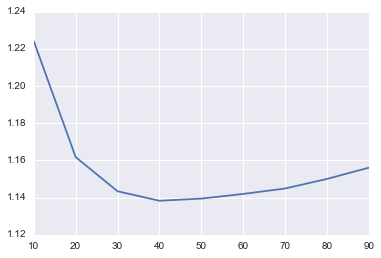

In [21]:
plt.plot(r, errors, label = "log loss")


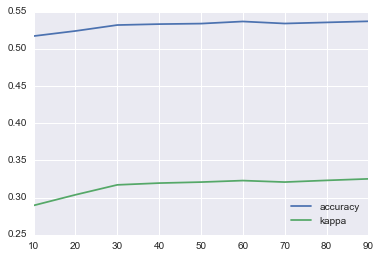

In [20]:
plt.plot(r, La, label = "accuracy")
plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')

go for n estimators = 40

In [22]:
errors = []
Lk = []
La = []

i=40
gbc = GradientBoostingClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 13, 
                             min_samples_leaf= 1, min_samples_split= 2, subsample= 0.8)
gbc.fit(Xpulse, y)
ll = log_loss(y_true, gbc.predict_proba(X_testpulse))

y_pred = gbc.predict(X_testpulse)
k=cohen_kappa_score(y_true, y_pred)
a= accuracy_score(y_true, y_pred)
print("for n_estimators= ", i)
print("log loss = ", ll)
print("kappa = ", k)
print("accuracy = ", a)


for n_estimators=  40
log loss =  1.1347003548292838
kappa =  0.3215558595348402
accuracy =  0.5358202144649783


Confusion matrix, without normalization
[[ 411    1  321  192   70]
 [  22    3  129   83   30]
 [  78    3 2249  772  179]
 [  47    2  843 1721   87]
 [  57    1  713  439  313]]
Normalized confusion matrix
[[4.13e-01 1.01e-03 3.23e-01 1.93e-01 7.04e-02]
 [8.24e-02 1.12e-02 4.83e-01 3.11e-01 1.12e-01]
 [2.38e-02 9.14e-04 6.85e-01 2.35e-01 5.46e-02]
 [1.74e-02 7.41e-04 3.12e-01 6.37e-01 3.22e-02]
 [3.74e-02 6.57e-04 4.68e-01 2.88e-01 2.06e-01]]


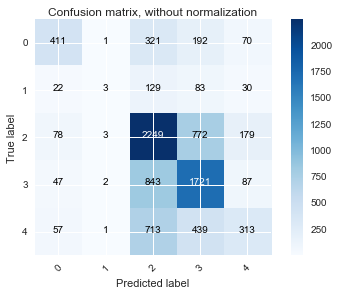

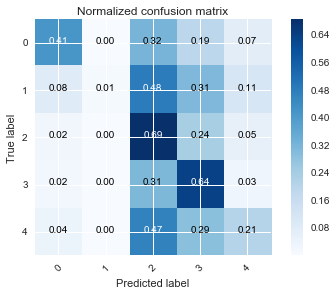

In [23]:
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4], title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

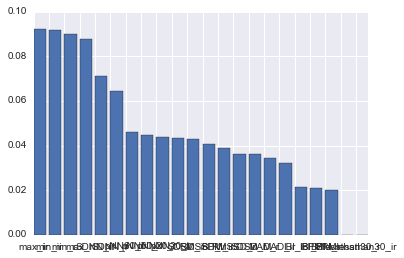

,importance
max_ir,0.092426
min_ir,0.091939
min_r,0.089934
max_r,0.087619
SDNN_ir,0.071292
SDNN_r,0.064474
pNN60_ir,0.045962
pNN60_r,0.044511
pNN20_r,0.043948
pNN20_ir,0.043584


In [25]:
importances = gbc.feature_importances_
feature_importances = pd.DataFrame(importances, index = Xpulse.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.bar(feature_importances.index, feature_importances["importance"])
plt.show()

feature_importances.head(50)

r and ir feature have comparable importance

In [26]:
low_r = Xpulse[Xpulse.BPMlessthan30_r!=0]
low_r.shape

(1225, 22)

In [27]:
low_r[low_r.BPMlessthan30_ir!=0].shape

(1113, 22)

1113 rows with BPM less than 30 for both sensors(error measures )

### filtering out for learning rows with less than 30 BPM for both sensors

when filtering the training set out of rows with BPM less than 30 bpm, for n_estimators=  30, get following performance
- kappa =  0.324
- accuracy =  0.537

to be compared with performance without filtering
- kappa =  0.324
- accuracy =  0.537

No performance gain from filtering out


In [28]:
XpulseF = Xpulse[Xpulse.BPMlessthan30_r==0][Xpulse.BPMlessthan30_ir==0]
XpulseF.shape

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(33732, 22)

In [29]:
yF= y[XpulseF.index]
yF.shape

(33732,)

In [30]:
np.all(yF.index == XpulseF.index)

True

In [31]:
gbc = GradientBoostingClassifier(n_estimators = 30, random_state=42)

r1 = [1]
r2 = [2]
parametres = {'max_depth': [5, 10, 13] ,'learning_rate': [0.1], "min_samples_leaf" : r1,  
              "min_samples_split" : r2, 'subsample': [0.7]}
    
ck_score = make_scorer(cohen_kappa_score)
grid = GridSearchCV(estimator=gbc, param_grid=parametres, scoring=ck_score, n_jobs=-1, verbose=2)

grid_fitted = grid.fit(XpulseF,yF)
print(grid_fitted.best_params_)

y_pred = grid.predict(X_testpulse)

print("kappa: ", cohen_kappa_score(y_true, y_pred))
print("accurancy for n_estimators  = " , accuracy_score(y_true, y_pred))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  1.4min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.4min finished


{'learning_rate': 0.1, 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'subsample': 0.7}
kappa:  0.30219703747515325
accurancy for n_estimators  =  0.5148300250969655


In [32]:
for i in r:
    gbc = GradientBoostingClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 13, 
                                 min_samples_leaf= 1, min_samples_split= 2, subsample= 0.8)
    gbc.fit(XpulseF, yF)
    ll = log_loss(y_true, gbc.predict_proba(X_testpulse))
    errors.append(ll)
    y_pred = gbc.predict(X_testpulse)
    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("for n_estimators= ", i)
    print("log loss = ", ll)
    print("kappa = ", k)
    print("accuracy = ", a)
    Lk.append(k)
    La.append(a)

for n_estimators=  10
log loss =  1.2353849026813395
kappa =  0.28159126498823506
accuracy =  0.5093543235227014
for n_estimators=  20
log loss =  1.1648491198732496
kappa =  0.3083409005442671
accuracy =  0.5216746520647958
for n_estimators=  30
log loss =  1.1517670959533284
kappa =  0.308616708788196
accuracy =  0.5211042664841433
for n_estimators=  40
log loss =  1.155329739646308
kappa =  0.30891781807536867
accuracy =  0.5211042664841433
for n_estimators=  50
log loss =  1.1514233836636671
kappa =  0.3148630837253308
accuracy =  0.525325119780972
for n_estimators=  60
log loss =  1.1476701001765974
kappa =  0.31394915677102586
accuracy =  0.5245265799680584
for n_estimators=  70
log loss =  1.1496095365683994
kappa =  0.31478297397479205
accuracy =  0.5247547342003194
for n_estimators=  80
log loss =  1.1510621180783998
kappa =  0.3163108545147847
accuracy =  0.5258955053616244
for n_estimators=  90
log loss =  1.1595569999934903
kappa =  0.3183661716791595
accuracy =  0.52760666

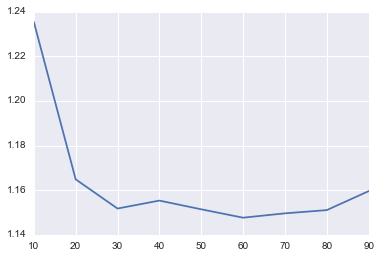

In [35]:
plt.plot(r, errors, label = "log loss")

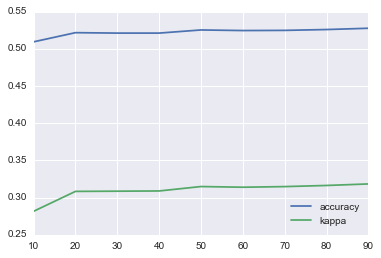

In [36]:
plt.plot(r, La, label = "accuracy")
plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')

go with 30

In [37]:
errors = []
Lk = []
La = []

i=30
gbc = GradientBoostingClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 15, 
                             min_samples_leaf= 1, min_samples_split= 2, subsample= 0.8)
gbc.fit(XpulseF, yF)
ll = log_loss(y_true, gbc.predict_proba(X_testpulse))

y_pred = gbc.predict(X_testpulse)
k=cohen_kappa_score(y_true, y_pred)
a= accuracy_score(y_true, y_pred)
print("for n_estimators= ", i)
print("log loss = ", ll)
print("kappa = ", k)
print("accuracy = ", a)

for n_estimators=  30
log loss =  1.163960406527906
kappa =  0.32534150803269735
accuracy =  0.5317134382842802


Confusion matrix, without normalization
[[ 437    3  292  183   80]
 [  38    3  123   71   32]
 [ 189   11 2197  675  209]
 [ 127    6  775 1686  106]
 [ 126    5  691  363  338]]
Normalized confusion matrix
[[0.44 0.   0.29 0.18 0.08]
 [0.14 0.01 0.46 0.27 0.12]
 [0.06 0.   0.67 0.21 0.06]
 [0.05 0.   0.29 0.62 0.04]
 [0.08 0.   0.45 0.24 0.22]]


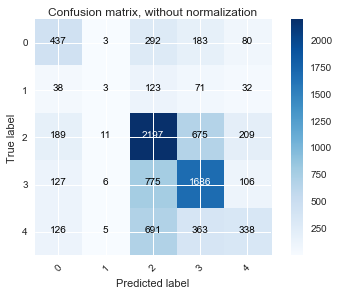

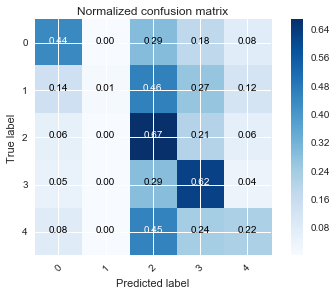

In [38]:
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4], title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

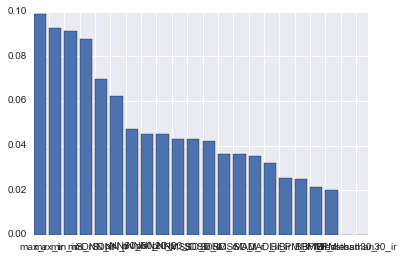

,importance
max_r,0.098780
max_ir,0.092532
min_ir,0.091211
min_r,0.087698
SDNN_ir,0.069946
SDNN_r,0.062253
pNN60_ir,0.047326
pNN60_r,0.045242
pNN20_ir,0.045136
pNN20_r,0.043063


In [40]:
importances = gbc.feature_importances_
feature_importances = pd.DataFrame(importances, index = Xpulse.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.bar(feature_importances.index, feature_importances["importance"])
plt.show()
feature_importances.head(30)

## Pulse amplitude
- non shuffle folds
- work with XGboost instead of gbm. (gbm kappa = 0.324 with suffle and gbm)

In [5]:

pulseAmp = pd.read_csv('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\pulse_ampTrain.csv')
pulseAmp = pulseAmp.iloc[:, 1:]

dataPath = "C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\raw\\"
trainOutput = pd.read_csv(dataPath + "challenge_fichier_de_sortie_dentrainement_classification_en_stade_de_sommeil_a_laide_de_signaux_mesures_par_le_bandeau_dreem.csv", sep=";")
Y = trainOutput["label"]

### reestablishing reference for pulse with Xgboost and non suffle flood 

In [6]:
pulse = pd.read_csv('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\pulse_featuresTrain.csv')
pulse = pulse.iloc[:, 1:]
df = pulse
df["Y"] = trainOutput["label"]

train = df.iloc[0:int(df.shape[0]*0.8), :]
test = df.iloc[int(df.shape[0]*0.8):, :]

In [7]:
Xpulse = train.iloc[:,:-1]
y = train.iloc[:,-1]
X_testpulse = test.iloc[:,:-1]
y_true = test.iloc[:,-1]

In [8]:
#L= list(naif.columns[:-1]) + list(acc.columns) + list(eeg.columns)
#Xpulse= X.drop(columns=L, inplace=False)
#X_testpulse = X_test.drop(columns=L, inplace=False)

In [9]:
Xpulse.columns

Index(['BPM_ir', 'IBI_ir', 'SDNN_ir', 'SDSD_ir', 'RMSSD_ir', 'pNN60_ir',
       'pNN20_ir', 'MAD_ir', 'BPMlessthan30_ir', 'max_ir', 'min_ir', 'BPM_r',
       'IBI_r', 'SDNN_r', 'SDSD_r', 'RMSSD_r', 'pNN60_r', 'pNN20_r', 'MAD_r',
       'BPMlessthan30_r', 'max_r', 'min_r'],
      dtype='object')

In [10]:
pulseAmp.columns

Index(['amp_mean_ir', 'amp_std_ir', 'amp_mean_r', 'amp_std_r'], dtype='object')

In [11]:
y_true.unique()

array([3, 2, 0, 1, 4], dtype=int64)

In [12]:
%%time
errors = []
Lk = []
La = []



r = range(10, 100, 10)

for i in r:       
    xbc = xgb.XGBClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 8,  subsample= 0.7, 
                            n_jobs=-2, reg_lambda=5)
    xbc.fit(Xpulse, y)
    ll = log_loss(y_true, xbc.predict_proba(X_testpulse))
    errors.append(ll)
    y_pred = xbc.predict(X_testpulse)
    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("considering ", i, " epochs")
    print("log loss = ", ll)
    print("kappa = ", k)
    print("accuracy = ", a)
    Lk.append(k)
    La.append(a)

considering  10  epochs
log loss =  1.4857452807498799
kappa =  0.07933773266127053
accuracy =  0.34188911704312114
considering  20  epochs
log loss =  1.4564693513089
kappa =  0.08187658564291844
accuracy =  0.3448551220625143
considering  30  epochs
log loss =  1.4599318510487067
kappa =  0.08070321962575322
accuracy =  0.34154688569472963
considering  40  epochs
log loss =  1.4667880793898693
kappa =  0.07165870136839503
accuracy =  0.33390371891398585
considering  50  epochs
log loss =  1.4760433372017485
kappa =  0.06929074604334196
accuracy =  0.3304814054300707
considering  60  epochs
log loss =  1.48776339712023
kappa =  0.0716293958506864
accuracy =  0.3308236367784622
considering  70  epochs
log loss =  1.4977909370223301
kappa =  0.07370806346178504
accuracy =  0.3311658681268538
considering  80  epochs
log loss =  1.5061954177887151
kappa =  0.06976535520466953
accuracy =  0.3264887063655031
considering  90  epochs
log loss =  1.516189093268709
kappa =  0.0678863330689381
a

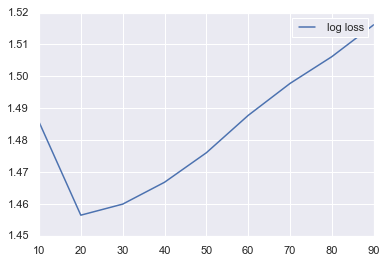

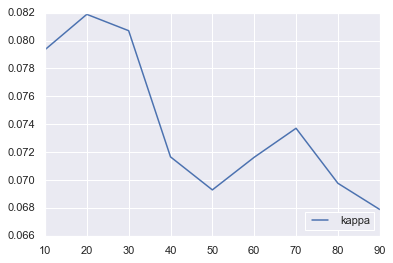

In [13]:
plt.plot(r, errors, label = "log loss")
plt.legend(loc='upper right')
plt.show()

plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')
plt.show()

### Pulse Amplitude

In [14]:
dataPath = "C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\raw\\"
trainOutput = pd.read_csv(dataPath + "challenge_fichier_de_sortie_dentrainement_classification_en_stade_de_sommeil_a_laide_de_signaux_mesures_par_le_bandeau_dreem.csv", sep=";")
Y = trainOutput["label"]

In [15]:
pulseAmp = pd.read_csv('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\pulse_ampTrain.csv')
pulseAmp = pulseAmp.iloc[:, 1:]


In [16]:
pulse.columns

Index(['BPM_ir', 'IBI_ir', 'SDNN_ir', 'SDSD_ir', 'RMSSD_ir', 'pNN60_ir',
       'pNN20_ir', 'MAD_ir', 'BPMlessthan30_ir', 'max_ir', 'min_ir', 'BPM_r',
       'IBI_r', 'SDNN_r', 'SDSD_r', 'RMSSD_r', 'pNN60_r', 'pNN20_r', 'MAD_r',
       'BPMlessthan30_r', 'max_r', 'min_r', 'Y'],
      dtype='object')

In [17]:
dfa = pulseAmp
dfa["Y"] = trainOutput["label"]

In [18]:
trainA = dfa.iloc[0:int(df.shape[0]*0.8), :]
testA = dfa.iloc[int(df.shape[0]*0.8):, :]

In [19]:
Xa = trainA.iloc[:,:-1]
ya = trainA.iloc[:,-1]
Xa_test = testA.iloc[:,:-1]
ya_true = testA.iloc[:,-1]

In [20]:
%%time
errors = []
Lk = []
La = []



r = range(10, 110, 10)

for i in r:       
    xbc = xgb.XGBClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 8,  subsample= 0.7, 
                            n_jobs=-2, reg_lambda=5)
    xbc.fit(Xa, y)
    ll = log_loss(y_true, xbc.predict_proba(Xa_test))
    errors.append(ll)
    y_pred = xbc.predict(Xa_test)
    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("considering ", i, " epochs")
    print("log loss = ", ll)
    print("kappa = ", k)
    print("accuracy = ", a)
    Lk.append(k)
    La.append(a)

considering  10  epochs
log loss =  1.4749275337417675
kappa =  0.053539518266137676
accuracy =  0.31793292265571527
considering  20  epochs
log loss =  1.441541418810563
kappa =  0.061379254870954414
accuracy =  0.32272416153319644
considering  30  epochs
log loss =  1.4430087585849576
kappa =  0.059904752426286456
accuracy =  0.32010038786219486
considering  40  epochs
log loss =  1.4438404289437379
kappa =  0.05686502828728002
accuracy =  0.31759069130732376
considering  50  epochs
log loss =  1.447914667352745
kappa =  0.05507492711490691
accuracy =  0.3153091489847137
considering  60  epochs
log loss =  1.4462197605633529
kappa =  0.053169474925901294
accuracy =  0.3132557608943646
considering  70  epochs
log loss =  1.4526023675872262
kappa =  0.05468553446947855
accuracy =  0.3134839151266256
considering  80  epochs
log loss =  1.4559216111347661
kappa =  0.051649424424124235
accuracy =  0.310631987223363
considering  90  epochs
log loss =  1.4558948191486685
kappa =  0.04987061

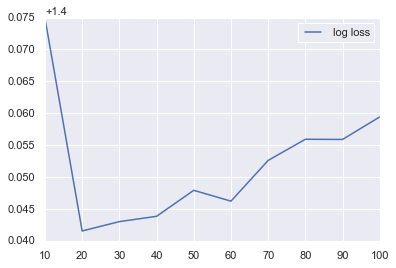

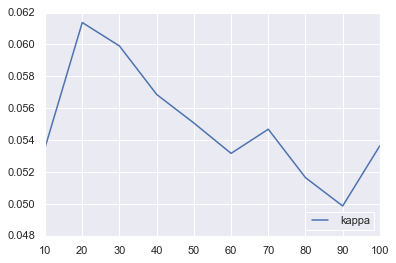

In [21]:
plt.plot(r, errors, label = "log loss")
plt.legend(loc='upper right')
plt.show()

plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')
plt.show()

In [22]:
print(Xa.index)
print(Xpulse.index)

RangeIndex(start=0, stop=35064, step=1)
RangeIndex(start=0, stop=35064, step=1)


In [25]:
Xap= pd.concat([Xa, Xpulse], axis = 1)
Xap_test = pd.concat([Xa_test, X_testpulse], axis = 1)

Index(['amp_mean_ir', 'amp_std_ir', 'amp_mean_r', 'amp_std_r', 'BPM_ir',
       'IBI_ir', 'SDNN_ir', 'SDSD_ir', 'RMSSD_ir', 'pNN60_ir', 'pNN20_ir',
       'MAD_ir', 'BPMlessthan30_ir', 'max_ir', 'min_ir', 'BPM_r', 'IBI_r',
       'SDNN_r', 'SDSD_r', 'RMSSD_r', 'pNN60_r', 'pNN20_r', 'MAD_r',
       'BPMlessthan30_r', 'max_r', 'min_r'],
      dtype='object')

In [27]:
%%time
errors = []
Lk = []
La = []



r = range(10, 110, 10)

for i in r:       
    xbc = xgb.XGBClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 8,  subsample= 0.7, 
                            n_jobs=-2, reg_lambda=5)
    xbc.fit(Xap, y)
    ll = log_loss(y_true, xbc.predict_proba(Xap_test))
    errors.append(ll)
    y_pred = xbc.predict(Xap_test)
    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("considering ", i, " epochs")
    print("log loss = ", ll)
    print("kappa = ", k)
    print("accuracy = ", a)
    Lk.append(k)
    La.append(a)

considering  10  epochs
log loss =  1.471057087563772
kappa =  0.07553994736839509
accuracy =  0.3413187314624686
considering  20  epochs
log loss =  1.4333601066430028
kappa =  0.07637341488450178
accuracy =  0.337326032397901
considering  30  epochs
log loss =  1.4262454551195216
kappa =  0.07486380041562346
accuracy =  0.3349304129591604
considering  40  epochs
log loss =  1.4305494798663108
kappa =  0.07200733518785929
accuracy =  0.3319644079397673
considering  50  epochs
log loss =  1.443636691411513
kappa =  0.07323699248761217
accuracy =  0.33105179101072324
considering  60  epochs
log loss =  1.4509133829044856
kappa =  0.06819612478685866
accuracy =  0.32603239790098104
considering  70  epochs
log loss =  1.4598907811850643
kappa =  0.06577804299187473
accuracy =  0.32306639288158795
considering  80  epochs
log loss =  1.4665757583604266
kappa =  0.06776947758067287
accuracy =  0.32340862422997946
considering  90  epochs
log loss =  1.475879376922028
kappa =  0.06517681574640

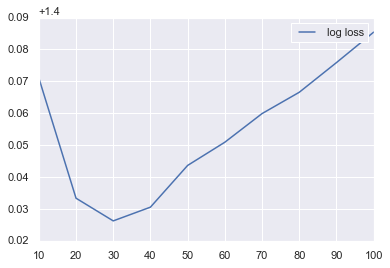

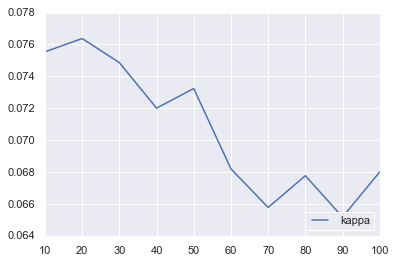

In [28]:
plt.plot(r, errors, label = "log loss")
plt.legend(loc='upper right')
plt.show()

plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')
plt.show()

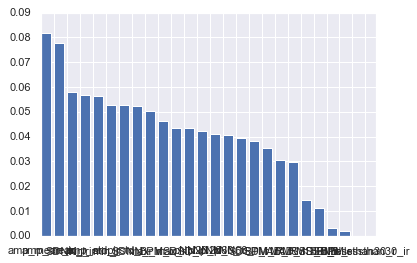

,importance
amp_mean_ir,0.081769
amp_mean_r,0.077883
SDNN_ir,0.058036
min_ir,0.056930
amp_std_ir,0.056407
min_r,0.052874
amp_std_r,0.052674
SDNN_r,0.052490
max_ir,0.050263
BPM_ir,0.046315


In [29]:
importances = xbc.feature_importances_
feature_importances = pd.DataFrame(importances, index = Xap.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.bar(feature_importances.index, feature_importances["importance"])
plt.show()

feature_importances.head(50)

## accelerometer

- kappa =  0.20032681770992822
- accuracy =  0.45550992470910334

In [33]:
gbc = GradientBoostingClassifier(n_estimators = 100, random_state=42)

r1 = [1]
r2 = [2]
parametres = {'max_depth': [5, 10, 15] ,'learning_rate': [0.1], "min_samples_leaf" : r1,  
              "min_samples_split" : r2, 'subsample': [0.6, 0.8, 1.0]}
    
ck_score = make_scorer(cohen_kappa_score)
grid = GridSearchCV(estimator=gbc, param_grid=parametres, scoring=ck_score, n_jobs=-1, verbose=2)

grid_fitted = grid.fit(Xacc,y)
print(grid_fitted.best_params_)

y_pred = grid.predict(X_testacc)

print("kappa: ", cohen_kappa_score(y_true, y_pred))
print("accurancy for n_estimators  = " , accuracy_score(y_true, y_pred))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 10.0min finished


{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'subsample': 0.8}
kappa:  0.2014534583916251
accurancy for n_estimators  =  0.45436915354779833


In [34]:
errors = []
Lk = []
La = []

r = range(10, 200 , 10)

for i in r:
    gbc = GradientBoostingClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 5, 
                                 min_samples_leaf= 1, min_samples_split= 2, subsample= 0.8)
    gbc.fit(Xacc, y)
    ll = log_loss(y_true, gbc.predict_proba(X_testacc))
    errors.append(ll)
    y_pred = gbc.predict(X_testacc)
    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("for n_estimators= ", i)
    print("log loss = ", ll)
    print("kappa = ", k)
    print("accuracy = ", a)
    Lk.append(k)
    La.append(a)

for n_estimators=  10
log loss =  1.3003055115808337
kappa =  0.17292956084203437
accuracy =  0.44455852156057496
for n_estimators=  20
log loss =  1.2509563445649654
kappa =  0.18748938060288622
accuracy =  0.45037645448323066
for n_estimators=  30
log loss =  1.237839088479316
kappa =  0.1955960609605949
accuracy =  0.4544832306639288
for n_estimators=  40
log loss =  1.2335416044354879
kappa =  0.1955447161248295
accuracy =  0.4539128450832763
for n_estimators=  50
log loss =  1.2314885955667123
kappa =  0.200631605028033
accuracy =  0.45653661875427787
for n_estimators=  60
log loss =  1.23084271494082
kappa =  0.20032681770992822
accuracy =  0.45550992470910334
for n_estimators=  70
log loss =  1.2313083882122569
kappa =  0.20276523940652935
accuracy =  0.4567647729865389
for n_estimators=  80
log loss =  1.2315300012910095
kappa =  0.20144187547225212
accuracy =  0.4549395391284508
for n_estimators=  90
log loss =  1.2324528085775655
kappa =  0.19985671328926136
accuracy =  0.453

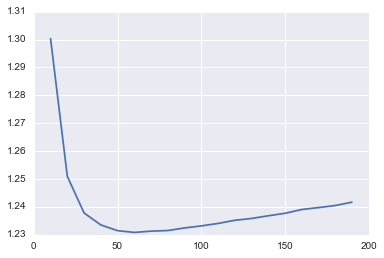

In [35]:
plt.plot(r, errors, label = "log loss")

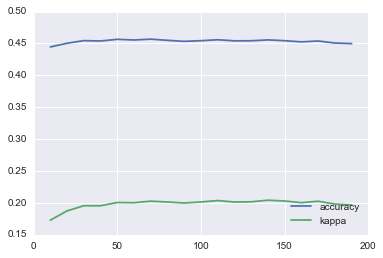

In [36]:
plt.plot(r, La, label = "accuracy")
plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')

go for 
- n_estimators=  60
- log loss =  1.23084271494082
- kappa =  0.20032681770992822
- accuracy =  0.45550992470910334

In [37]:
errors = []
Lk = []
La = []

i=60
gbc = GradientBoostingClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 5, 
                             min_samples_leaf= 1, min_samples_split= 2, subsample= 0.8)
gbc.fit(Xacc, y)
ll = log_loss(y_true, gbc.predict_proba(X_testacc))

y_pred = gbc.predict(X_testacc)
k=cohen_kappa_score(y_true, y_pred)
a= accuracy_score(y_true, y_pred)
print("for n_estimators= ", i)
print("log loss = ", ll)
print("kappa = ", k)
print("accuracy = ", a)

for n_estimators=  60
log loss =  1.23084271494082
kappa =  0.20032681770992822
accuracy =  0.45550992470910334


Confusion matrix, without normalization
[[ 411    2  398  100   84]
 [   8    0  156   76   27]
 [ 119    2 2078  916  166]
 [  73    0 1218 1307  102]
 [ 108    1  916  301  197]]
Normalized confusion matrix
[[4.13e-01 2.01e-03 4.00e-01 1.01e-01 8.44e-02]
 [3.00e-02 0.00e+00 5.84e-01 2.85e-01 1.01e-01]
 [3.63e-02 6.10e-04 6.33e-01 2.79e-01 5.06e-02]
 [2.70e-02 0.00e+00 4.51e-01 4.84e-01 3.78e-02]
 [7.09e-02 6.57e-04 6.01e-01 1.98e-01 1.29e-01]]


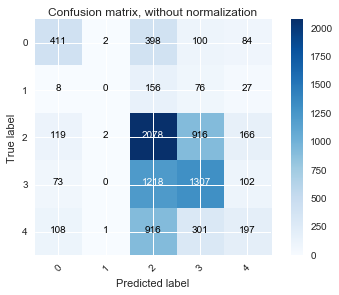

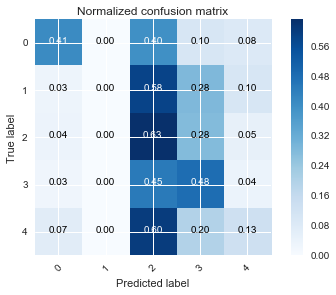

In [38]:
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4], title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

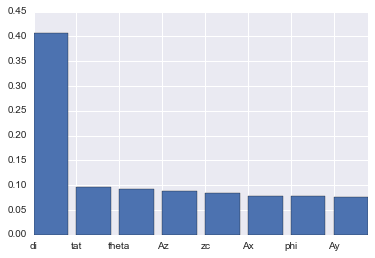

,importance
di,0.406980
tat,0.096994
theta,0.092444
Az,0.087422
zc,0.084391
Ax,0.079032
phi,0.077345
Ay,0.075392


In [39]:
importances = gbc.feature_importances_
feature_importances = pd.DataFrame(importances, index = Xacc.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.bar(feature_importances.index, feature_importances["importance"])
plt.show()

feature_importances.head(50)

## EEG 

- for n_estimators=  50
- log loss =  0.643
- kappa =  0.677
- accuracy =  0.770

In [40]:
gbc = GradientBoostingClassifier(n_estimators = 100, random_state=42)

r1 = [1]
r2 = [2]
parametres = {'max_depth': [5, 10, 15] ,'learning_rate': [0.1], "min_samples_leaf" : r1,  
              "min_samples_split" : r2, 'subsample': [0.6, 0.8, 1.0]}
    
ck_score = make_scorer(cohen_kappa_score)
grid = GridSearchCV(estimator=gbc, param_grid=parametres, scoring=ck_score, n_jobs=-1, verbose=2)

grid_fitted = grid.fit(Xeeg,y)
print(grid_fitted.best_params_)

y_pred = grid.predict(X_testeeg)

print("kappa: ", cohen_kappa_score(y_true, y_pred))
print("accurancy for n_estimators  = " , accuracy_score(y_true, y_pred))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 29.1min finished


{'learning_rate': 0.1, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'subsample': 0.6}
kappa:  0.6809982803479084
accurancy for n_estimators  =  0.7724161533196441


In [41]:
errors = []
Lk = []
La = []

r = range(10, 120 , 10)

for i in r:
    gbc = GradientBoostingClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 15, 
                                 min_samples_leaf= 1, min_samples_split= 2, subsample= 0.6)
    gbc.fit(Xeeg, y)
    ll = log_loss(y_true, gbc.predict_proba(X_testeeg))
    errors.append(ll)
    y_pred = gbc.predict(X_testeeg)
    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("for n_estimators= ", i)
    print("log loss = ", ll)
    print("kappa = ", k)
    print("accuracy = ", a)
    Lk.append(k)
    La.append(a)

for n_estimators=  10
log loss =  0.8059113371481063
kappa =  0.6442403658948297
accuracy =  0.7465206479580196
for n_estimators=  20
log loss =  0.6727804586373809
kappa =  0.6580532906993616
accuracy =  0.756331279945243
for n_estimators=  30
log loss =  0.6424191095187666
kappa =  0.6674617379004719
accuracy =  0.7629477526808123
for n_estimators=  40
log loss =  0.6388770979619007
kappa =  0.6684017600648389
accuracy =  0.7636322153775953
for n_estimators=  50
log loss =  0.6428503684054544
kappa =  0.6766699915692966
accuracy =  0.7694501483002509
for n_estimators=  60
log loss =  0.6529632376891017
kappa =  0.6764571414246807
accuracy =  0.76922199406799
for n_estimators=  70
log loss =  0.6671445117667734
kappa =  0.6784415011887965
accuracy =  0.770590919461556
for n_estimators=  80
log loss =  0.6780241124650682
kappa =  0.6810357439127855
accuracy =  0.7724161533196441
for n_estimators=  90
log loss =  0.6890969063851781
kappa =  0.6799289042561721
accuracy =  0.7717316906228

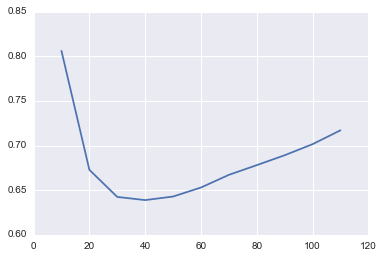

In [42]:
plt.plot(r, errors, label = "log loss")

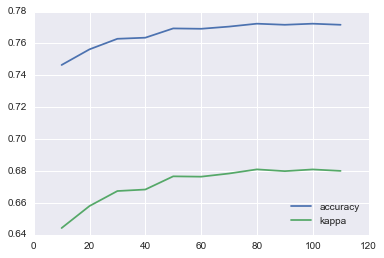

In [43]:
plt.plot(r, La, label = "accuracy")
plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')

go for n estimators = 50 

In [44]:
errors = []
Lk = []
La = []

i=50
gbc = GradientBoostingClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 15, 
                             min_samples_leaf= 1, min_samples_split= 2, subsample= 0.6)
gbc.fit(Xeeg, y)
ll = log_loss(y_true, gbc.predict_proba(X_testeeg))

y_pred = gbc.predict(X_testeeg)
k=cohen_kappa_score(y_true, y_pred)
a= accuracy_score(y_true, y_pred)
print("for n_estimators= ", i)
print("log loss = ", ll)
print("kappa = ", k)
print("accuracy = ", a)

for n_estimators=  50
log loss =  0.6428503684054544
kappa =  0.6766699915692966
accuracy =  0.7694501483002509


Confusion matrix, without normalization
[[ 802    8  117   42   26]
 [  35   44   87    9   92]
 [  90    8 2547  383  253]
 [  65    0  335 2293    7]
 [  48    3  356   57 1059]]
Normalized confusion matrix
[[0.81 0.01 0.12 0.04 0.03]
 [0.13 0.16 0.33 0.03 0.34]
 [0.03 0.   0.78 0.12 0.08]
 [0.02 0.   0.12 0.85 0.  ]
 [0.03 0.   0.23 0.04 0.7 ]]


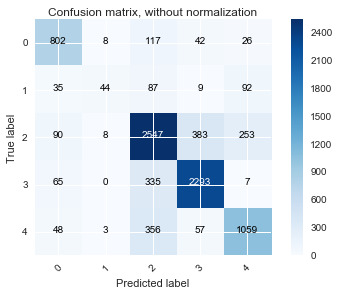

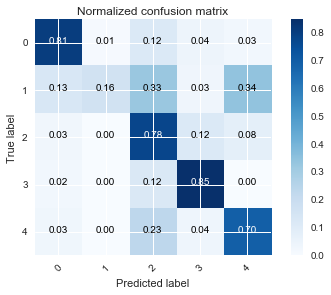

In [45]:
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4], title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

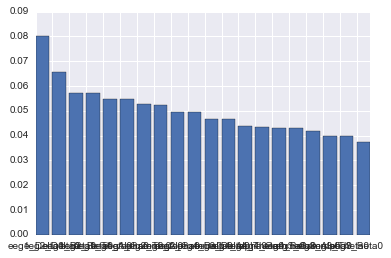

,importance
eeg1_Delta0,0.080099
eeg2_Delta0,0.065535
eeg1_Beta0,0.057204
eeg2_Beta0,0.057018
eeg1_Theta0,0.054848
eeg1_Alpha0,0.054742
eeg1_Gamma0,0.052833
eeg2_Theta0,0.052266
eeg2_Alpha0,0.049620
eeg2_Gamma0,0.049418


In [46]:
importances = gbc.feature_importances_
feature_importances = pd.DataFrame(importances, index = Xeeg.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.bar(feature_importances.index, feature_importances["importance"])
plt.show()

feature_importances.head(50)

### EEG 2
fourrier transformation on 2 seconds instead of 30 sec
We run gradien boosting with same parameters than EEG 30.
We get

- for n_estimators=  50
- log loss =  0.643
- kappa =  0.663
- accuracy =  0.763

to be compared with EEG 30 

- for n_estimators= 50
- log loss = 0.643
- kappa = 0.677
- accuracy = 0.770

so it is slightly less good !



In [47]:
eeg = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\spectrogram_eeg_features2Train.xlsx')

In [48]:
for i in range(15):
    eeg.drop(columns=["eeg1_Above100Hz"+str(i), 
                      "eeg2_Above100Hz"+str(i), 
                      "eeg3_Above100Hz"+str(i), 
                      "eeg4_Above100Hz"+str(i)], inplace=True)


In [49]:
naif = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\featuresTrain.xlsx')
acc = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\acc_featuresTrain.xlsx')
pulse = pd.read_csv('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\pulse_featuresTrain.csv')

In [50]:
df = pd.concat([eeg, acc, pulse, naif], axis=1)
training, test  = train_test_split(df, test_size=0.2, random_state=42)
X = training.iloc[:,:-1]
y = training.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_true = test.iloc[:,-1]
L= list(naif.columns[:-1]) + list(acc.columns) + list(pulse.columns)
Xeeg = X.drop(columns=L, inplace=False)
X_testeeg = X_test.drop(columns=L, inplace=False)



In [51]:
X_testeeg.head()

,eeg1_Delta0,eeg1_Delta1,eeg1_Delta2,eeg1_Delta3,eeg1_Delta4,eeg1_Delta5,eeg1_Delta6,eeg1_Delta7,eeg1_Delta8,eeg1_Delta9,...,eeg4_Gamma5,eeg4_Gamma6,eeg4_Gamma7,eeg4_Gamma8,eeg4_Gamma9,eeg4_Gamma10,eeg4_Gamma11,eeg4_Gamma12,eeg4_Gamma13,eeg4_Gamma14
5893,5.320132e+02,8.468122e+03,1.132002e+03,3.863802e+03,7.584245e+02,1.581040e+03,1.128094e+03,1.581492e+03,8.771071e+03,2.803468e+03,...,0.070719,0.096417,0.061366,0.104105,0.057201,0.085339,0.080706,0.063332,0.084062,0.084242
30655,6.243131e+03,7.405709e+03,3.411004e+03,6.335467e+03,2.079382e+03,2.919818e+03,3.971909e+02,2.790681e+03,8.696755e+03,3.021535e+04,...,0.169244,0.131790,0.089263,0.146979,0.106534,0.147993,0.121191,0.147792,0.162898,0.142825
26876,3.950311e+06,6.244127e+06,1.586868e+06,1.865611e+06,1.249526e+07,2.088012e+06,3.221711e+06,2.571789e+06,6.939601e+06,2.203957e+06,...,792.907098,382.495990,222.329493,9931.514311,289.700601,330.953637,258.608677,241.532249,628.344249,251.533789
35378,8.111320e+03,3.774252e+03,2.952485e+03,2.572026e+03,7.086189e+02,1.878845e+03,1.485150e+03,8.563586e+02,6.523599e+02,2.570270e+03,...,0.112227,0.099281,0.068986,0.057622,0.060030,0.067208,0.153101,0.088763,0.091776,0.071760
11933,3.232913e+02,4.612790e+02,1.479059e+02,3.653277e+02,2.392818e+03,4.994426e+03,2.086840e+03,3.594560e+02,1.785876e+02,6.689791e+03,...,6.308429,4.074933,3.235952,4.179114,4.275896,3.584981,3.903742,4.008789,4.897875,4.555130


In [52]:

i=50
gbc = GradientBoostingClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 15, 
                             min_samples_leaf= 1, min_samples_split= 2, subsample= 0.6)
gbc.fit(Xeeg, y)
ll = log_loss(y_true, gbc.predict_proba(X_testeeg))

y_pred = gbc.predict(X_testeeg)
k=cohen_kappa_score(y_true, y_pred)
a= accuracy_score(y_true, y_pred)
print("for n_estimators= ", i)
print("log loss = ", ll)
print("kappa = ", k)
print("accuracy = ", a)

for n_estimators=  50
log loss =  0.6425063126769058
kappa =  0.6627738572503876
accuracy =  0.7627195984485512


# EEG with xgboost and non shuffle fold

In [7]:
dataPath = "C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\raw\\"
eeg = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\spectrogram_eeg_features30Train.xlsx')
trainOutput = pd.read_csv(dataPath + "challenge_fichier_de_sortie_dentrainement_classification_en_stade_de_sommeil_a_laide_de_signaux_mesures_par_le_bandeau_dreem.csv", sep=";")
eeg.drop(columns=["eeg1_Above100Hz0", "eeg2_Above100Hz0", "eeg3_Above100Hz0", "eeg4_Above100Hz0"], inplace=True)

df = eeg
df["Y"] = trainOutput["label"]

train = df.iloc[0:int(df.shape[0]*0.8), :]
test = df.iloc[int(df.shape[0]*0.8):, :]

In [8]:
Xeeg = train.iloc[:,:-1]
y = train.iloc[:,-1]
X_testeeg = test.iloc[:,:-1]
y_true = test.iloc[:,-1]



In [9]:
print(y.unique())
Xeeg.columns

[0 1 2 3 4]


Index(['eeg1_Delta0', 'eeg1_Theta0', 'eeg1_Alpha0', 'eeg1_Beta0',
       'eeg1_Gamma0', 'eeg2_Delta0', 'eeg2_Theta0', 'eeg2_Alpha0',
       'eeg2_Beta0', 'eeg2_Gamma0', 'eeg3_Delta0', 'eeg3_Theta0',
       'eeg3_Alpha0', 'eeg3_Beta0', 'eeg3_Gamma0', 'eeg4_Delta0',
       'eeg4_Theta0', 'eeg4_Alpha0', 'eeg4_Beta0', 'eeg4_Gamma0'],
      dtype='object')

In [12]:
%%time
errors = []
Lk = []
La = []
r = range(30, 210, 10)

for i in r:       
    xbc = xgb.XGBClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 8,  subsample= 0.7, 
                            n_jobs=-2, reg_lambda=5)
    xbc.fit(Xeeg, y)
    ll = log_loss(y_true, xbc.predict_proba(X_testeeg))
    errors.append(ll)
    y_pred = xbc.predict(X_testeeg)
    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("considering ", i, " epochs")
    print("log loss = ", ll)
    print("kappa = ", k)
    print("accuracy = ", a)
    Lk.append(k)
    La.append(a)

considering  30  epochs
log loss =  0.8410558256331492
kappa =  0.5831848417301376
accuracy =  0.6925621720282912
considering  40  epochs
log loss =  0.812480413639026
kappa =  0.5891611121363214
accuracy =  0.6972393337896418
considering  50  epochs
log loss =  0.7979571118378409
kappa =  0.5904573856175626
accuracy =  0.6982660278348163
considering  60  epochs
log loss =  0.7922739838886375
kappa =  0.5865515259107388
accuracy =  0.6951859456992927
considering  70  epochs
log loss =  0.7886896295249445
kappa =  0.5875715296169489
accuracy =  0.6959844855122063
considering  80  epochs
log loss =  0.7881317211637695
kappa =  0.5863051290271137
accuracy =  0.6949577914670317
considering  90  epochs
log loss =  0.7862494815125664
kappa =  0.5860014006315355
accuracy =  0.6947296372347707
considering  100  epochs
log loss =  0.7861189567333629
kappa =  0.5867906269643296
accuracy =  0.6953000228154232
considering  110  epochs
log loss =  0.7879593657786416
kappa =  0.5845906995539976
accu

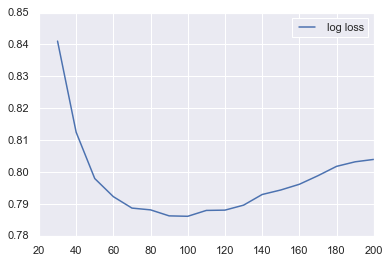

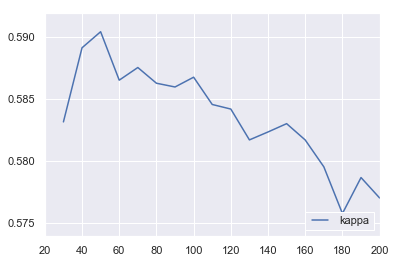

In [13]:
plt.plot(r, errors, label = "log loss")
plt.legend(loc='upper right')
plt.show()

plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')
plt.show()

#### trying with decibel (log)
- might be a tiny bit better but it could be luck

In [27]:
df = np.log10(eeg)
df["Y"] = trainOutput["label"]

train = df.iloc[0:int(df.shape[0]*0.8), :]
test = df.iloc[int(df.shape[0]*0.8):, :]

In [28]:
Xeeg = train.iloc[:,:-1]
y = train.iloc[:,-1]
X_testeeg = test.iloc[:,:-1]
y_true = test.iloc[:,-1]


In [29]:
%%time
errors = []
Lk = []
La = []
r = range(30, 210, 10)

for i in r:       
    xbc = xgb.XGBClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 8,  subsample= 0.7, 
                            n_jobs=-2, reg_lambda=5)
    xbc.fit(Xeeg, y)
    ll = log_loss(y_true, xbc.predict_proba(X_testeeg))
    errors.append(ll)
    y_pred = xbc.predict(X_testeeg)
    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("considering ", i, " epochs")
    print("log loss = ", ll)
    print("kappa = ", k)
    print("accuracy = ", a)
    Lk.append(k)
    La.append(a)

considering  30  epochs
log loss =  0.8416125814092776
kappa =  0.5841917692360029
accuracy =  0.6932466347250742
considering  40  epochs
log loss =  0.8124196188625933
kappa =  0.58645703378032
accuracy =  0.6953000228154232
considering  50  epochs
log loss =  0.7957501932243431
kappa =  0.5907471072985717
accuracy =  0.6984941820670774
considering  60  epochs
log loss =  0.7898329085446877
kappa =  0.587365035764195
accuracy =  0.6958704083960757
considering  70  epochs
log loss =  0.786481326889075
kappa =  0.5889048775427185
accuracy =  0.6970111795573808
considering  80  epochs
log loss =  0.7835849449978222
kappa =  0.588935077799043
accuracy =  0.6968971024412502
considering  90  epochs
log loss =  0.7827824911168736
kappa =  0.5845606517402822
accuracy =  0.6934747889573352
considering  100  epochs
log loss =  0.7814877885817706
kappa =  0.5838318338988877
accuracy =  0.6930184804928131
considering  110  epochs
log loss =  0.7829698726912855
kappa =  0.5842572680011046
accuracy

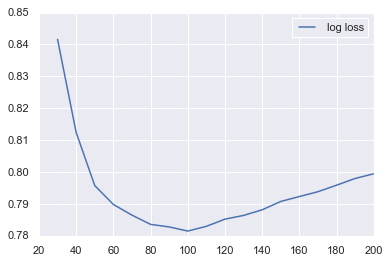

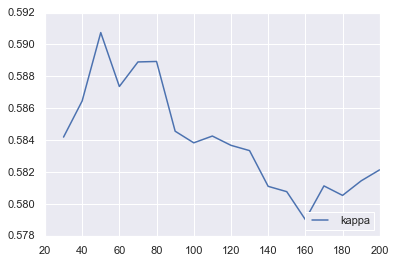

In [30]:
plt.plot(r, errors, label = "log loss")
plt.legend(loc='upper right')
plt.show()

plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')
plt.show()

In [ ]:
#### adding power sum

In [61]:
dataPath = "C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\raw\\"
eeg = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\spectrogram_eeg_features30Train.xlsx')
trainOutput = pd.read_csv(dataPath + "challenge_fichier_de_sortie_dentrainement_classification_en_stade_de_sommeil_a_laide_de_signaux_mesures_par_le_bandeau_dreem.csv", sep=";")
eeg.drop(columns=["eeg1_Above100Hz0", "eeg2_Above100Hz0", "eeg3_Above100Hz0", "eeg4_Above100Hz0"], inplace=True)


In [62]:
df = eeg
df['eeg_energy']= eeg.sum(axis=1)
#df['eeg1_energy'] = eeg.loc[:, 'eeg1_Delta0':'eeg1_Gamma0'].sum(axis=1)
#df['eeg2_energy'] = eeg.loc[:, 'eeg2_Delta0':'eeg2_Gamma0'].sum(axis=1)
#df['eeg3_energy'] = eeg.loc[:, 'eeg3_Delta0':'eeg3_Gamma0'].sum(axis=1)
#df['eeg4_energy'] = eeg.loc[:, 'eeg4_Delta0':'eeg4_Gamma0'].sum(axis=1)

In [56]:
eeg.loc[:, 'eeg1_Delta0':'eeg1_Gamma0'].columns

Index(['eeg1_Delta0', 'eeg1_Theta0', 'eeg1_Alpha0', 'eeg1_Beta0',
       'eeg1_Gamma0'],
      dtype='object')

In [64]:
df["Y"] = trainOutput["label"]

train = df.iloc[0:int(df.shape[0]*0.8), :]
test = df.iloc[int(df.shape[0]*0.8):, :]

In [65]:
Xeeg = train.iloc[:,:-1]
y = train.iloc[:,-1]
X_testeeg = test.iloc[:,:-1]
y_true = test.iloc[:,-1]

In [68]:
%%time
# with energy per captors
#log loss =  0.7856534234256973
#kappa =  0.5922992953360089
#with sum of energy of the captors
#log loss =  0.7822896453321189
#kappa =  0.5992079234528738

errors = []
Lk = []
La = []
r = range(30, 160, 10)

for i in r:       
    xbc = xgb.XGBClassifier(n_estimators = i, random_state=42, learning_rate= 0.1, max_depth= 8,  subsample= 0.7, 
                            n_jobs=-2, reg_lambda=5)
    xbc.fit(Xeeg, y)
    ll = log_loss(y_true, xbc.predict_proba(X_testeeg))
    errors.append(ll)
    y_pred = xbc.predict(X_testeeg)
    k=cohen_kappa_score(y_true, y_pred)
    a= accuracy_score(y_true, y_pred)
    print("considering ", i, " epochs")
    print("log loss = ", ll)
    print("kappa = ", k)
    print("accuracy = ", a)
    Lk.append(k)
    La.append(a)

considering  30  epochs
log loss =  0.8404968839607063
kappa =  0.5977933203881023
accuracy =  0.704083960757472
considering  40  epochs
log loss =  0.8133727314935314
kappa =  0.5991866960911022
accuracy =  0.7051106548026466
considering  50  epochs
log loss =  0.7975292664665934
kappa =  0.5965712950384446
accuracy =  0.703171343828428
considering  60  epochs
log loss =  0.7866340602218795
kappa =  0.5964106379850385
accuracy =  0.702943189596167
considering  70  epochs
log loss =  0.7822896453321189
kappa =  0.5992079234528738
accuracy =  0.7049965776865161
considering  80  epochs
log loss =  0.7800389927757312
kappa =  0.5946528550337143
accuracy =  0.7016883413187315
considering  90  epochs
log loss =  0.77945033574466
kappa =  0.5946586807397041
accuracy =  0.7015742642026009
considering  100  epochs
log loss =  0.7800440651940672
kappa =  0.5968134500091078
accuracy =  0.703171343828428
considering  110  epochs
log loss =  0.7801716407057014
kappa =  0.5939671730500187
accuracy 

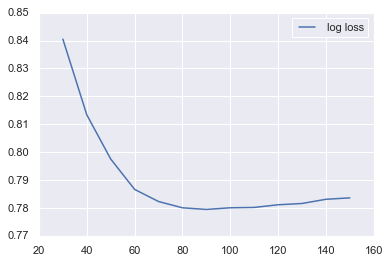

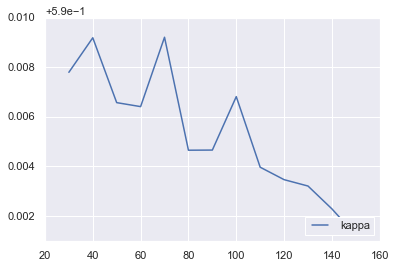

In [70]:
plt.plot(r, errors, label = "log loss")
plt.legend(loc='upper right')
plt.show()

plt.plot(r, Lk, label = "kappa")
plt.legend(loc='lower right')
plt.show()